# Linear Regression (Scikit Learn): Despesas Médicas

- Estimando despesas médicas anuais de novos clientes, baseado em informações como: idade, sexo, IMC, filhos, hábitos de tabagismo, e região de residência.

In [2566]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2567]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7bad33488d70>)

In [2568]:
import pandas as pd

df = pd.read_csv('medical.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Análise e Objetivo

O conjunto de dados contém 1.338 linhas e 7 colunas. Cada linha do conjunto de dados contém informações sobre um cliente.

Nosso objetivo é encontrar uma forma de estimar o valor da coluna "charges" usando os valores das demais colunas. Se pudermos fazer isso com os dados históricos, também poderemos estimar as cobranças para novos clientes, simplesmente solicitando informações como idade, sexo, IMC, número. número de crianças, hábitos tabágicos e região.

In [2569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2570]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [2571]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2572]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Idade

Idade é uma coluna numérica: o valor mínimo no dataset é 18, e a idade máxima é 64. Podemos usar um histograma com 47 compartimentos (64-18=47) para visualizar a distribuição por idade.

In [2573]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [2574]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

A distribuição das idades no conjunto de dados é quase uniforme, contendo cerca de 20 a 30 clientes em todas as idades, exceto as idades de 18 e 19 anos, que parecem ter mais do dobro de clientes das outras idades.

### Distribuição do ICM 
As medições do índice de massa corporal parecem formar uma **distribuição gaussiana** centrada em torno do valor 30, com alguns valores discrepantes à direita.

<img src="https://i.imgur.com/lh23OiY.jpg">

In [2575]:
fig = px.histogram(df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

### Gastos

Vamos visualizar a distribuição dos “encargos”, ou seja, os encargos médicos anuais dos clientes. Esta é a coluna que estamos tentando prever. Vamos também usar a coluna categórica “fumante” para distinguir as cobranças para fumantes e não fumantes.

In [2576]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges (smoker vs non-smoker)')
fig.update_layout(bargap=0.1)
fig.show()

Podemos fazer as seguintes observações a partir do gráfico acima:

- Para a maioria dos clientes, as despesas médicas anuais são inferiores a \$10.000. Apenas uma pequena fração dos clientes tem despesas médicas mais elevadas, possivelmente devido a acidentes, doenças graves e doenças genéticas. 

- A distribuição segue uma **"lei de potência"**.

- Existe uma diferença significativa nas despesas médicas entre fumantes e não fumantes. Enquanto a mediana para não fumantes é de 7.300, a mediana para fumantes está próxima de 35.000.

In [2577]:
fig = px.histogram(df, 
                   x='charges', 
                   color='sex', 
                   color_discrete_sequence=['purple', 'blue'], 
                   title='Annual Medical Charges (female vs male)')
fig.update_layout(bargap=0.1)
fig.show()

In [2578]:
fig = px.histogram(df, 
                   y='charges', 
                   x='region',
                   title='Annual Medical Charges by region')
fig.update_layout(bargap=0.1)
fig.show()

### Fumantes

In [2579]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [2580]:
px.histogram(df, 
             x='smoker', 
             color='sex', 
             title='Smoker')

In [2581]:
fig = px.scatter(df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [2582]:
fig4 = px.violin(df, 
                 x='smoker', 
                 y='charges', 
                 box=True,
                 title='Distribution of Charges by Smoking Status')
fig4.show()

A tendência geral parece ser que as despesas médicas aumentem com a idade, como seria de esperar. No entanto, há uma variação significativa em cada idade e está claro que a idade por si só não pode ser usada para determinar com precisão as despesas médicas.

Temos 3 "agrupamentos" de pontos, onde cada um dos uais parece formar uma linha crescente:

1. O primeiro e maior grupo consiste principalmente em "não fumantes saudáveis" que têm despesas médicas relativamente baixas em comparação com outros.

2. O segundo grupo contém uma mistura de fumantes e não fumantes.

3. O grupo final consiste exclusivamente de fumantes, presumivelmente fumantes com problemas médicos graves que podem estar relacionados ou agravados pelo tabagismo.

### IMC e Custos

- Análise da relação entre IMC (BMI - body mass index) e custos médicos. Mais uma vez destacando a diferença dos valores de fumantes e não fumantes.


In [2583]:
fig = px.scatter(df,
                 x = 'bmi',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8,
                 hover_data = ['sex'],
                 title = 'BMI vs. Charges')
fig.update_traces(marker_size = 5)
fig.show()

### Número de filhos

In [2584]:
# Média de gastos por número de filhos
mean_charges = df.groupby('children')['charges'].mean().reset_index()
print(mean_charges)

fig = px.bar(mean_charges, 
             x='children', 
             y='charges', 
             title='Average Annual Medical Charges by Number of Children',
             labels={'children': 'number of children', 'charges': 'average medical charges ($)'},
             text_auto=True)

fig.update_layout(bargap=0.1)
fig.update_traces(marker_line_width=2, marker_line_color='black')

fig.show()


   children       charges
0         0  12365.975602
1         1  12731.171832
2         2  15073.563734
3         3  15355.318367
4         4  13850.656311
5         5   8786.035247


In [2585]:
# df.all() # children false?
df.charges.corr(df.age)

np.float64(0.2990081933306476)

In [2586]:
# Valor Total de gastos por número de filhos

fig = px.violin(df, x='children', y='charges',
                labels={'children': 'number of children', 'charges': 'sum of medical charges ($)'},
)
fig.show()

## Correlação

Dado as análises realizadas, podemos notar que os valores em algumas colunas estão mais intimamente relacionados aos valores em “charges” em comparação com outras colunas. Por exemplo, "age" e "charges" parecem crescer juntas, enquanto “IMC” e "charges" não. 

Esta relação é frequentemente expressa numericamente usando uma medida chamada **coeficiente de correlação**, que pode ser calculada usando o método `.corr` de uma série *Pandas*.

In [2587]:
# Coeficiente de correlação entre gastos e idade
df.charges.corr(df.age)

np.float64(0.2990081933306476)

In [2588]:
# Coeficiente de correlação entre gastos e IMC
df.charges.corr(df.bmi)

/home/avila/cs/workspace/py/machine-learning/Linear Regression/MedicalExpenses/venv/lib/python3.12/site-packages/IPython/core/displayhook.py:281: UserWarning:

Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.



np.float64(0.19834096883362895)

In [2589]:
# Coeficiente de correlação entre gastos e número de filhos
df.charges.corr(df.children)

np.float64(0.06799822684790478)

Para computar correlação para colunas **categóricas** (como fumantes e não fumantes), primeiro devemos *converte-las para colunas numéricas* (mapeando).

In [2590]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)

df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

Veja como os coeficientes de correlação podem ser interpretados (fonte):

- **Força**: Quanto maior o valor absoluto do coeficiente de correlação, mais forte é a relação.

  - Os valores extremos de -1 e 1 indicam uma relação perfeitamente linear onde uma mudança numa variável é acompanhada por uma mudança perfeitamente consistente na outra. Para esses relacionamentos, todos os pontos de dados ficam em uma linha. Na prática, você não verá nenhum dos dois tipos de relacionamento perfeito.

  - Um coeficiente de zero não representa nenhuma relação linear. À medida que uma variável aumenta, não há tendência na outra variável de aumentar ou diminuir.

  - Quando o valor está entre 0 e +1/-1, há uma relação, mas nem todos os pontos caem em uma linha. À medida que r se aproxima de -1 ou 1, a força do relacionamento aumenta e os pontos de dados tendem a ficar mais próximos de uma linha.

- **Direção**: O sinal do coeficiente de correlação representa a direção do relacionamento.

 - Coeficientes positivos indicam que quando o valor de uma variável aumenta, o valor da outra variável também tende a aumentar. Relacionamentos positivos produzem uma inclinação ascendente em um gráfico de dispersão.

 - Os coeficientes negativos representam casos em que o valor de uma variável aumenta, o valor da outra variável tende a diminuir. Relacionamentos negativos produzem uma inclinação descendente.

<div style="text-align: center;">
    <img src="https://i.imgur.com/3XUpDlw.png" style="width: 50%; background-color: white;">
</div>

- O Coeficiente de Correlação é cálculado pela seguinte fórmula:

<div style="text-align: center;">
    <img src="https://i.imgur.com/unapugP.png" style="width: 50%; background-color: white;">
</div>

Os dataframes do *Pandas* também fornecem um método `.corr` para calcular os coeficientes de correlação entre todos os pares de colunas numéricas.

In [2591]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_numeric.corr()
print(corr_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


O resultado da função `.corr` é chamado de **matriz de correlação** e é visualizado por meio de um heatmap. 

<Axes: >

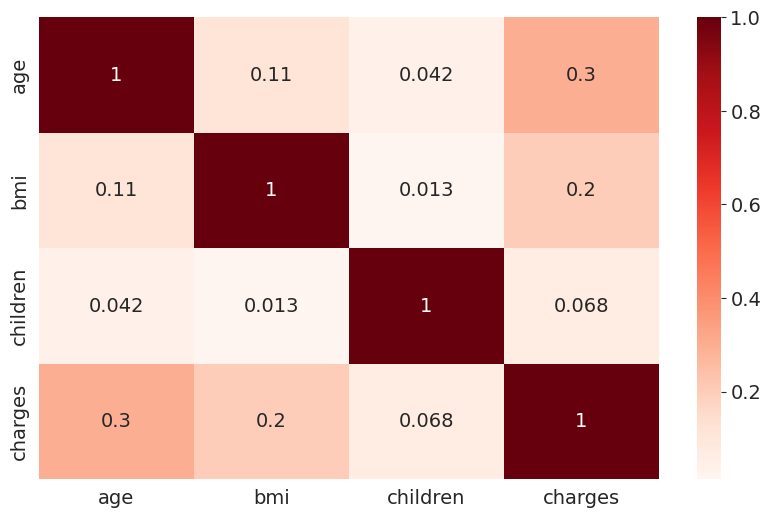

In [2592]:
# Selecionando apenas colunas numéricas do dataframe
df_numeric = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, cmap='Reds', annot=True)


### Falácia de Correlação VS Causalidade

Observe que uma correlação alta não pode ser usada para interpretar uma relação de causa-efeito entre recursos. Duas características XX e YY podem ser correlacionadas se XX causar YY ou se YY causar XX, ou se ambos forem causados ​​independentemente por algum outro fator ZZ, e a correlação não será mais verdadeira se uma das relações de causa-efeito for quebrada. Também é possível que XX e YY simplesmente pareçam estar correlacionados porque a amostra é muito pequena.

Embora isto possa parecer óbvio, os computadores não conseguem diferenciar entre correlação e causalidade, e as decisões baseadas em sistemas automatizados podem muitas vezes ter consequências importantes na sociedade, por isso é importante estudar porque é que os sistemas automatizados levam a um determinado resultado. Determinar relações de causa-efeito requer visão humana.

## Regressão Linear com Feature única


Tendo em vista que `smoker` e `age` são as colunas que possuem maior correlação com `charges`, vamos tentar encontrar uma forma de estimar valores de `charges` usando o valo de `age` de *não-fumantes*. Para isso, primeiro criamos um data frame contendo apenas os dados de não-fumantes:

In [2593]:
non_smoker = df[df.smoker == 'no']

Visualizando a relação entre `age` e `charges`:

<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

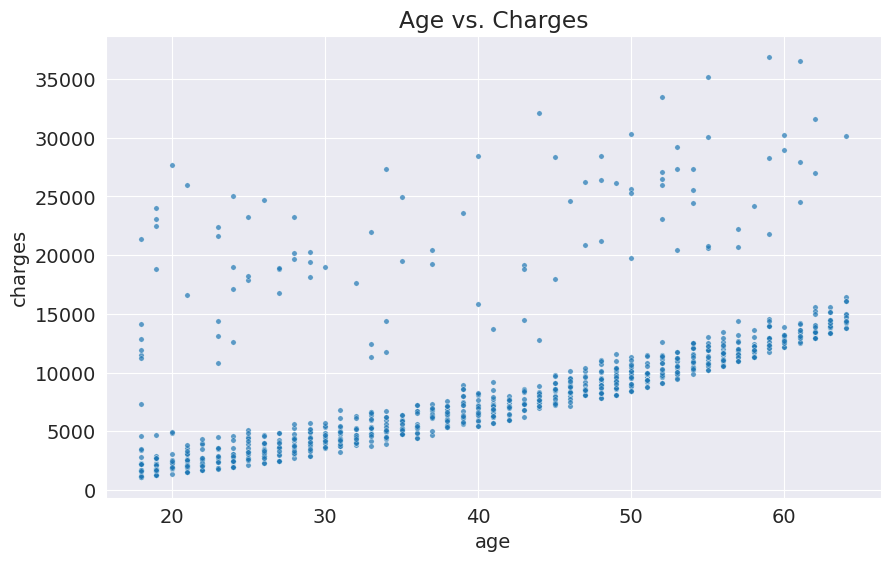

In [2594]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker, x='age', y='charges', alpha=0.7, s=15)

Salvo algumas exceções, os pontos parece formar uma linha. Tentaremos encaixar uma linha usando os pontos, e usaremos essa linha para prever cobranças para uma determinada idade. Uma linha nas coordenadas X e Y tem a seguinte fórmula: 

- $y = wx+b$, onde $w$ é o **coeficiente** que define a inclinação da reta (*slope*) e $b$ é o **termo constante** da reta - ponto onde a linha cruza o eixo das ordenadas (*intercept*).

### Modelo

No caso acima, o eixo x mostra `age` (variável independente) e o eixo y mostra `charges` (variável dependente), ou seja, os gastos médicos estão em função da idade - valores de `charges` dependem de `age`. Assim, seguindo a equação da reta, estamos assumindo a seguinte relação entre os dois: 

$charge = w *$ age $+ b$

- Os valores `w` e `b` são chamados ***parâmetros*** ou ***peso*** do modelo.
- Os valores na coluna de `age` são chamados ***inputs*** do modelo, e os valores da coluna de `charges` são chamados `target` (valores alvo).


Tentaremos determinar $w$ e $b$, com o objeivo de encontrar a linha que melhor se ajusta aos dados, ou seja, que ***minimiza a soma dos erros quadráticos***.

Vamos definir uma função auxiliar `estimate_charges` para calcular `charges` a partir de `age`, `w` e `b`.

In [2595]:
def estimate_charges(age, w, b):
  return w * age + b

Vamos tentar *adivinhar* os valores de $w$ e $b$ para estimar o valor dos gastos médicos.

In [2596]:
w = 50
b = 100

In [2597]:
# Valor real: Próximo de 5000
# Valor previsto: 1600 -> ou seja, os valores que tentamos adivinhar tem uma alta margem de erro

estimate_charges(30, w, b)

1600

In [2598]:
# Calculando valores estimados de gastos
ages = non_smoker.age 
estimated_charges = estimate_charges(ages, w, b)

print("\n------------------ Ages ------------------") 
print(ages)

print("\n------------ Valor Estimado Charges ------------") # Valor que tentamos estimar a partir de w e b 
print(estimated_charges)

print("\n------------ Valor Real Charges ------------") # Valor real de gastos, que desejamos aproximar (target)
non_smoker.charges


------------------ Ages ------------------
1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

------------ Valor Estimado Charges ------------
1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

------------ Valor Real Charges ------------


1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Charges')

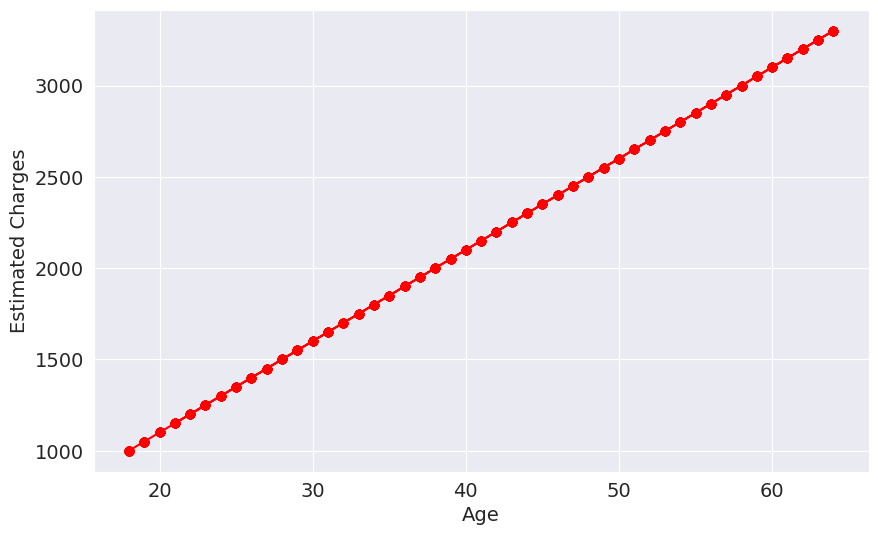

In [2599]:
# Podemos plotar estimate_charges usando um grafico de linhas
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

<hr>

#### Erro = Valor real - valor previsto

> **Minimizar a soma dos erros quadráticos** garante que o modelo é o mais preciso possível dentro do contexto da regressão linear. Um modelo que minimiza essa soma prevê valores que estão, em média, mais próximos dos valores reais, o que o torna mais confiável para fazer previsões futuras. Ao minimizar a soma dos erros quadráticos, estamos procurando a linha que melhor representa a relação entre as variáveis nos dados.

Quando tentamos prever um valor $f(x)$ baseado em um valor $x$, nem sempre a previsão é exata. O **erro** é a diferença entre o valor real (*observado*) e o valor previsto (*calculado pela função*). Seja $y$ o valor real e $y'$ o valor previsto, o erro pode ser calculado pela diferença: $E = y-y$.
 
Os erros podem ser positivos ou negativos, dependendo se o valor previsto é *menor* ou *maior* que o valor real. Se simplesmente somássemos os erros, os positivos e negativos poderiam se cancelar, o que não daria uma medida adequada do **desempenho do modelo**. Para evitar isso, elevamos cada erro ao quadrado, o que nos gera duas consequências importantes:
 
- **Positividade** - Valores sempre positivos
- **Penalização de grandes erros** - Erros maiores são penalizados mais severamente porque seus valores terão *crescimento quadrático*.

Então para cada par de valores (x, y), o erro quadrático é: $E = (y - y')^2$

#### Soma dos Erros Quadráticos (Desempenho Geral)

Para avaliar o **desempenho** geral do modelo em relação a todos os pontos de dados disponíveis, somamos todos os erros quadráticos. Isso nos dá a ***Soma dos Quadrados dos Resíduos (RSS - Residual Sum of Squares):***

- $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

Onde $n$ é o número total de pontos de dados.

<hr>

Podemos sobrepor a linha do resultado anterior aos dados reais, para ver qual bem nosso modelo se ajusta aos dados


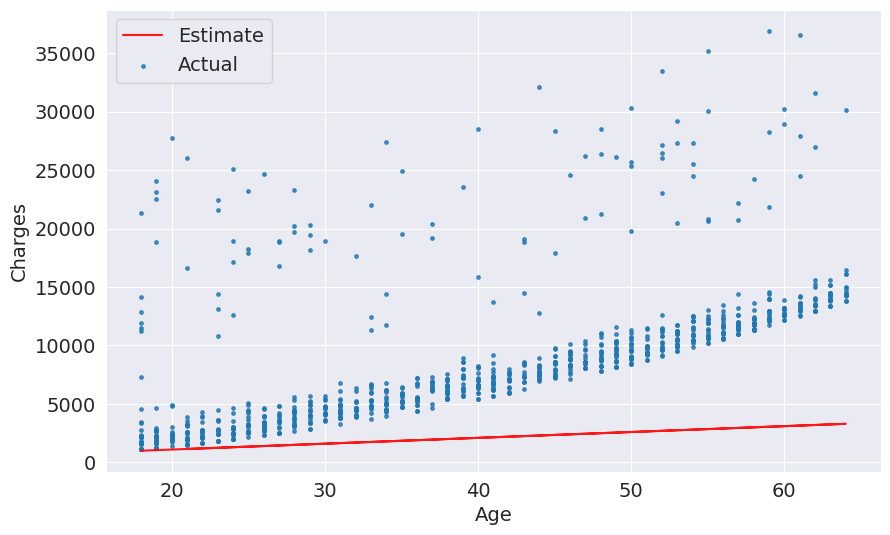

In [2600]:
target = non_smoker.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=6,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Podemos notar que as nossas estimativas são bastante fracas, e alinha não "se ajusta" aos dados. No entanto, podemos tentar diferentes valores de `w` e `b` para mover a linha. Vamos definir uma função auxiliar `try_parameters`que leva `w` e `b` como entradas e cria o gráfico acima.

In [2601]:
# Agora podemos testar valores, até que as variáveis ajustem a reta
def try_parameters(w, b):
    ages = non_smoker.age
    target = non_smoker.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

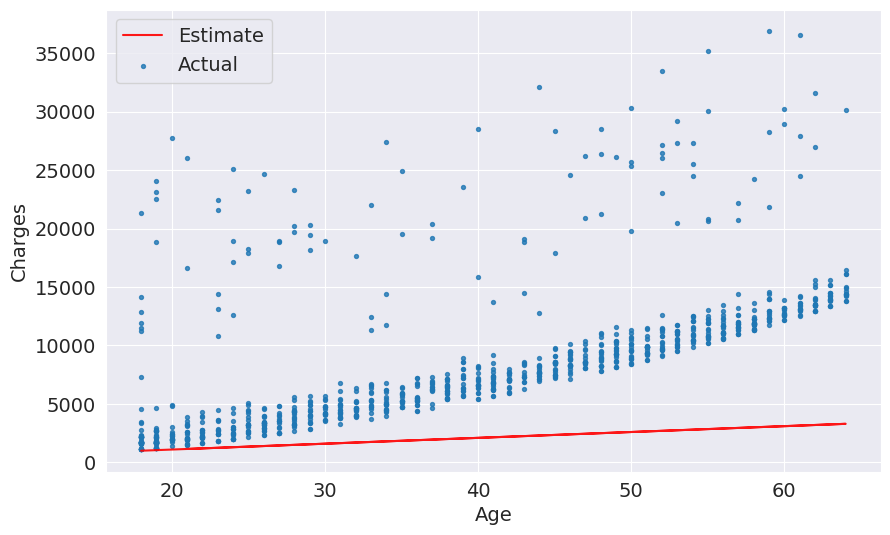

In [2602]:
# Expirmentando valores
try_parameters(50, 100)

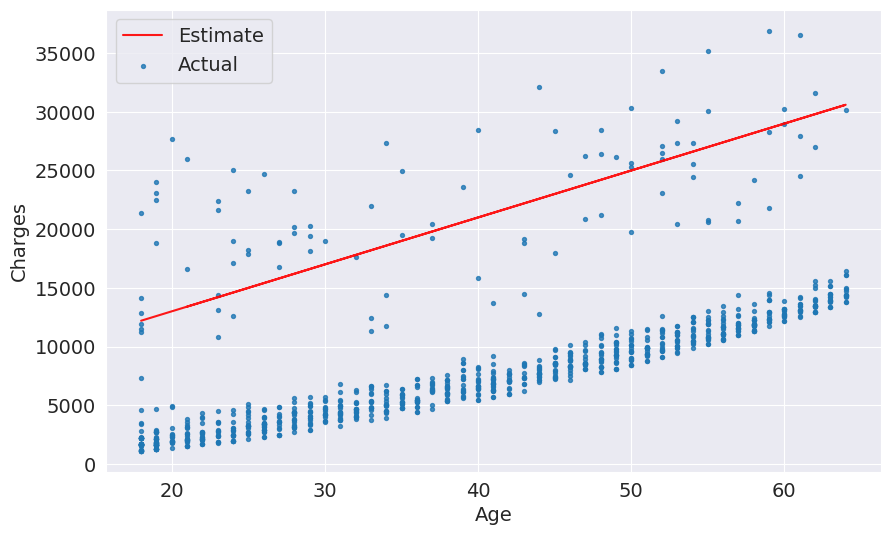

In [2603]:
# Expirmentando valores
try_parameters(400, 5000)

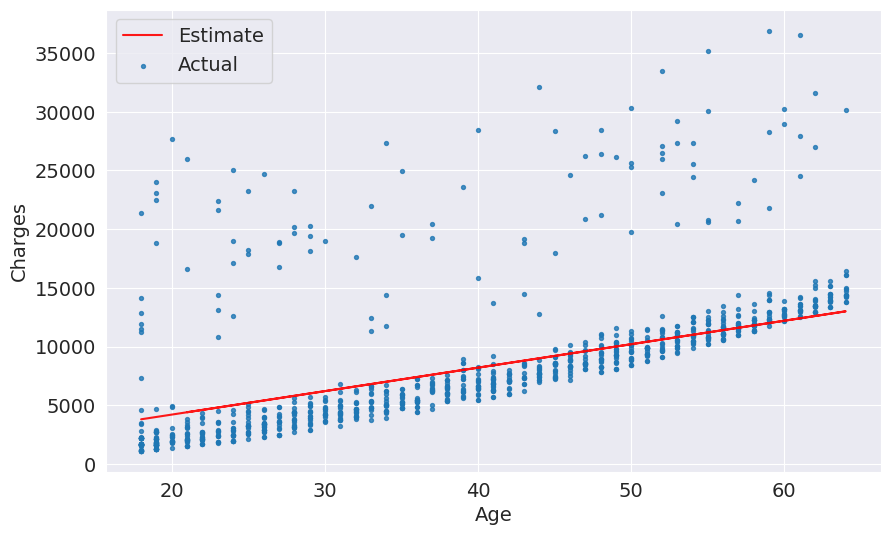

In [2604]:
# Expirmentando valores
try_parameters(200, 200)

Note que a medida que manipulamos w e b manualmente, aprendemos a relação aproximada entre `age` e `charges`. Tendo isso em vista, podemos usar a regressão linear para que o computador aprenda esta relação, mas para isso precisamos resolver alguns problemas:

1. Precisamos de uma maneira de medir numericamnete quão bem a reta se ajusta aos pontos.
2. Uma vez calculada a "medida de ajuste", precisamos de uma maneira de modificar `w` e `b` para melhorar o ajuste.

Se pudermos resolver os problemas acima, deverá ser possível para um computador determinar w e b para a linha de melhor ajuste, começando com uma estimativa aleatória. 

### Função Perda/Custo

Podemos comparar as previsões do nosso modelo com os valos reais usando o seguinte método:

- Calcule a diferença entre as metas e as previsões (o diferencial é chamado de "***residual***")
- Eleve ao quadrado todos os elementos da matriz de diferenças para remover valores negativos.
- Calcule a média dos elementos da matriz resultante.
- Tire a raiz quadrada do resultado.

O resultado é um único número, conhecido como ***Raiz do Erro Quadrático Médio*** (*Root Mean Square Error* - RMSE). A descrição acima pode ser declarada matematicamente da seguinte forma:

<img src="https://i.imgur.com/WCanPkA.png">

Geometricamente, os **resíduos** podem ser visualizados da seguinte forma:

<img src="https://i.imgur.com/ll3NL80.png" width="50%">

In [2605]:
# Raiz de Erro Quadrático Médio (RSME)
import numpy as np

def rmse(target, predictions):
  return np.sqrt(np.mean(np.square(target-predictions)))

- Para cada valor correspondente de `target` subtraímos `predicted` - operação ***element-wise*** - para cada par de elementos nos arrays.
- Em seguida elevamos ao quadrado **cada um** desses erros para eliminar os sinais negativos e dar mais peso aos erros maiores.
- Por fim calculamos a média desses valores e tiramos a raiz quadrada da média dos erros quadráticos (RSME)

> Quando você faz a operação $target - predicted$, o numpy implicitamente itera sobre cada elemento correspondente dos arrays.

In [2606]:
# estipulando valores para calcular o RMSE
w = 50
b = 100

# definindo target e previsão
target = non_smoker['charges']
predicted = estimate_charges(non_smoker.age, w, b)

# Resultado RMSE
rmse_result = rmse(target, predicted)


Em médica, cada elemento na previsão difere da meta real em $8461$. O resultado é chamado de *perda* porque indica o quão fraco o modelo é na previsão das variáveis-alvo. Representa perda de informação no modelo: quanto menor a perda, melhor o modelo.

In [2607]:
# Modificando try_paramenters para exibir a perda (RSME)
def try_parameters(w, b):
    ages = non_smoker.age
    target = non_smoker.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print(f"RMSE Loss = {loss:.2f}")

RMSE Loss = 4781.92


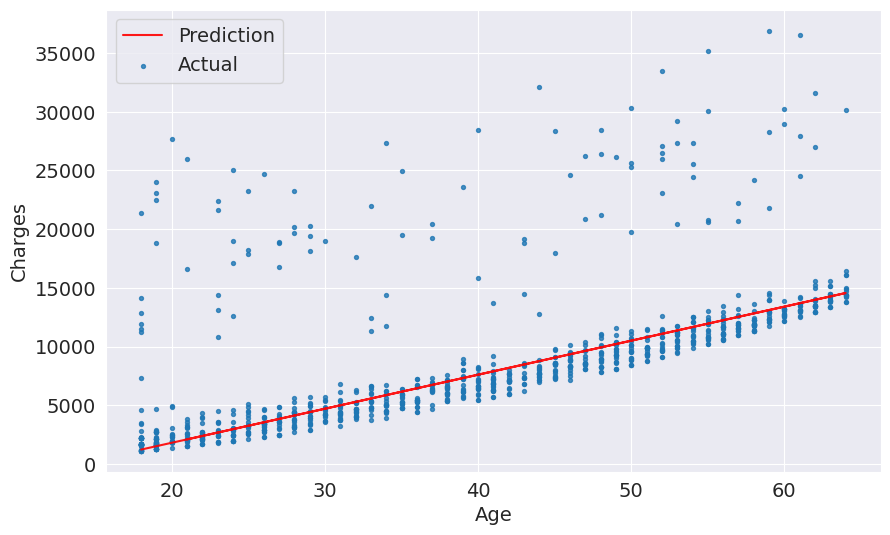

In [2608]:
try_parameters(290,-4000)